# Default of Credit Card Clients - Classification

###### Link to the Dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

###### Importing Libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

###### Reading the Dataset into Pandas DataFrame

In [109]:
data=pd.read_csv('default.csv',header=1,index_col=0)

In [110]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [112]:
data.isnull()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###### The data has been pre-processed by embarking the categorcial features in the above step

In [113]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

###### There are no null values present in the data in any column

#### y is the target variable and the variable X is the dataframe of all independent variables

In [114]:
y=data['default payment next month']
X=data.drop('default payment next month',axis=1)

### Introducing 10% of the data in each column with nan values

In [115]:
def input_nan(x,pct):
    n = int(len(x)*(pct - x.isna().mean()))
    idxs = np.random.choice(len(x), max(n,0), replace=False, p=x.notna()/x.notna().sum())
    x.iloc[idxs] = np.nan

In [116]:
X.apply(input_nan, pct=.05)

LIMIT_BAL    None
SEX          None
EDUCATION    None
MARRIAGE     None
AGE          None
PAY_0        None
PAY_2        None
PAY_3        None
PAY_4        None
PAY_5        None
PAY_6        None
BILL_AMT1    None
BILL_AMT2    None
BILL_AMT3    None
BILL_AMT4    None
BILL_AMT5    None
BILL_AMT6    None
PAY_AMT1     None
PAY_AMT2     None
PAY_AMT3     None
PAY_AMT4     None
PAY_AMT5     None
PAY_AMT6     None
dtype: object

### Counts nans present in each column of the dataframe

In [117]:
X.isnull().sum()

LIMIT_BAL    1500
SEX          1500
EDUCATION    1500
MARRIAGE     1500
AGE          1500
PAY_0        1500
PAY_2        1500
PAY_3        1500
PAY_4        1500
PAY_5        1500
PAY_6        1500
BILL_AMT1    1500
BILL_AMT2    1500
BILL_AMT3    1500
BILL_AMT4    1500
BILL_AMT5    1500
BILL_AMT6    1500
PAY_AMT1     1500
PAY_AMT2     1500
PAY_AMT3     1500
PAY_AMT4     1500
PAY_AMT5     1500
PAY_AMT6     1500
dtype: int64

Text(0.5, 1.0, 'Age Histogram')

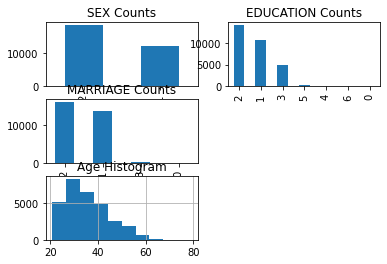

In [118]:
# Set up a grid of plots
fig_dims = (3,2)

# Plot SEX counts
plt.subplot2grid(fig_dims, (0, 0))
data['SEX'].value_counts().plot(kind='bar', 
                                         title='SEX Counts')

# Plot EDUCATION counts
plt.subplot2grid(fig_dims, (0, 1))
data['EDUCATION'].value_counts().plot(kind='bar', 
                                         title='EDUCATION Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
data['MARRIAGE'].value_counts().plot(kind='bar', 
                                         title='MARRIAGE Counts')
# Plot the Age histogram
plt.subplot2grid(fig_dims, (2,0))
data['AGE'].hist()
plt.title('Age Histogram')

### From the above histogram for AGE, we can see that the graph is in normal distribution:

### Imputation of NaN values

In [119]:
X['SEX'].value_counts()
#Since 2 has more frequency, we will replace nan with 2
X['SEX'].replace(np.nan,2,inplace=True)
X['SEX'].isnull().sum()

0

In [120]:
X['EDUCATION'].value_counts()
#Since 2 has more frequency, we will replace nan with 2
X['EDUCATION'].replace(np.nan,2,inplace=True)
X['EDUCATION'].isnull().sum()

0

In [121]:
X['MARRIAGE'].value_counts()
#Since 2 has more frequency, we will replace nan with 2
X['MARRIAGE'].replace(np.nan,2,inplace=True)
X['MARRIAGE'].isnull().sum()

0

In [122]:
X['PAY_0'].value_counts()
#Since 0 has more frequency, we will replace nan with 0
X['PAY_0'].replace(np.nan,0,inplace=True)
X['PAY_0'].isnull().sum()

0

In [123]:
X['PAY_2'].value_counts()
#Since 0 has more frequency, we will replace nan with 0
X['PAY_2'].replace(np.nan,0,inplace=True)
X['PAY_2'].isnull().sum()

0

In [124]:
X['PAY_3'].value_counts()
#Since 0 has more frequency, we will replace nan with 0
X['PAY_3'].replace(np.nan,0,inplace=True)
X['PAY_3'].isnull().sum()

0

In [125]:
X['PAY_4'].value_counts()
#Since 0 has more frequency, we will replace nan with 0
X['PAY_4'].replace(np.nan,0,inplace=True)
X['PAY_4'].isnull().sum()

0

In [126]:
X['PAY_5'].value_counts()
#Since 0 has more frequency, we will replace nan with 0
X['PAY_5'].replace(np.nan,0,inplace=True)
X['PAY_5'].isnull().sum()

0

In [127]:
X['PAY_6'].value_counts()
#Since 0 has more frequency, we will replace nan with 0
X['PAY_6'].replace(np.nan,0,inplace=True)
X['PAY_6'].isnull().sum()

0

In [128]:
X_GROUPED=X.groupby(['SEX','EDUCATION'])
X['LIMIT_BAL'] = X['LIMIT_BAL'].fillna(X['LIMIT_BAL'].apply('mean'))
X['LIMIT_BAL'].isnull().sum()

0

In [129]:
X['AGE'] = X['AGE'].fillna(X['AGE'].apply('mean'))
X['AGE'].isnull().sum()

0

In [130]:
X['BILL_AMT1'] = X['BILL_AMT1'].fillna(X['BILL_AMT1'].apply('median'))
X['BILL_AMT1'].isnull().sum()

0

In [131]:
X['BILL_AMT2'] = X['BILL_AMT2'].fillna(X['BILL_AMT2'].apply('median'))
X['BILL_AMT2'].isnull().sum()

0

In [132]:
X['BILL_AMT3'] = X['BILL_AMT3'].fillna(X['BILL_AMT3'].apply('median'))
X['BILL_AMT3'].isnull().sum()

0

In [133]:
X['BILL_AMT4'] = X['BILL_AMT4'].fillna(X['BILL_AMT4'].apply('median'))
X['BILL_AMT4'].isnull().sum()

0

In [134]:
X['BILL_AMT5'] = X['BILL_AMT5'].fillna(X['BILL_AMT5'].apply('median'))
X['BILL_AMT5'].isnull().sum()

0

In [135]:
X['BILL_AMT6'] = X['BILL_AMT6'].fillna(X['BILL_AMT6'].apply('median'))
X['BILL_AMT6'].isnull().sum()

0

In [136]:
X['PAY_AMT1'] = X['PAY_AMT1'].fillna(X['PAY_AMT1'].apply('median'))
X['PAY_AMT1'].isnull().sum()

0

In [137]:
X['PAY_AMT2'] = X['PAY_AMT2'].fillna(X['PAY_AMT2'].apply('median'))
X['PAY_AMT2'].isnull().sum()

0

In [138]:
X['PAY_AMT3'] = X['PAY_AMT3'].fillna(X['PAY_AMT3'].apply('median'))
X['PAY_AMT3'].isnull().sum()

0

In [139]:
X['PAY_AMT4'] = X['PAY_AMT4'].fillna(X['PAY_AMT4'].apply('median'))
X['PAY_AMT4'].isnull().sum()

0

In [140]:
X['PAY_AMT5'] = X['PAY_AMT5'].fillna(X['PAY_AMT5'].apply('median'))
X['PAY_AMT5'].isnull().sum()

0

In [141]:
X['PAY_AMT6'] = X['PAY_AMT6'].fillna(X['PAY_AMT6'].apply('median'))
X['PAY_AMT6'].isnull().sum()

0

In [142]:
X.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

# Correlation HeatMap of Variables

In [143]:
corrd=X.corr()

<AxesSubplot:>

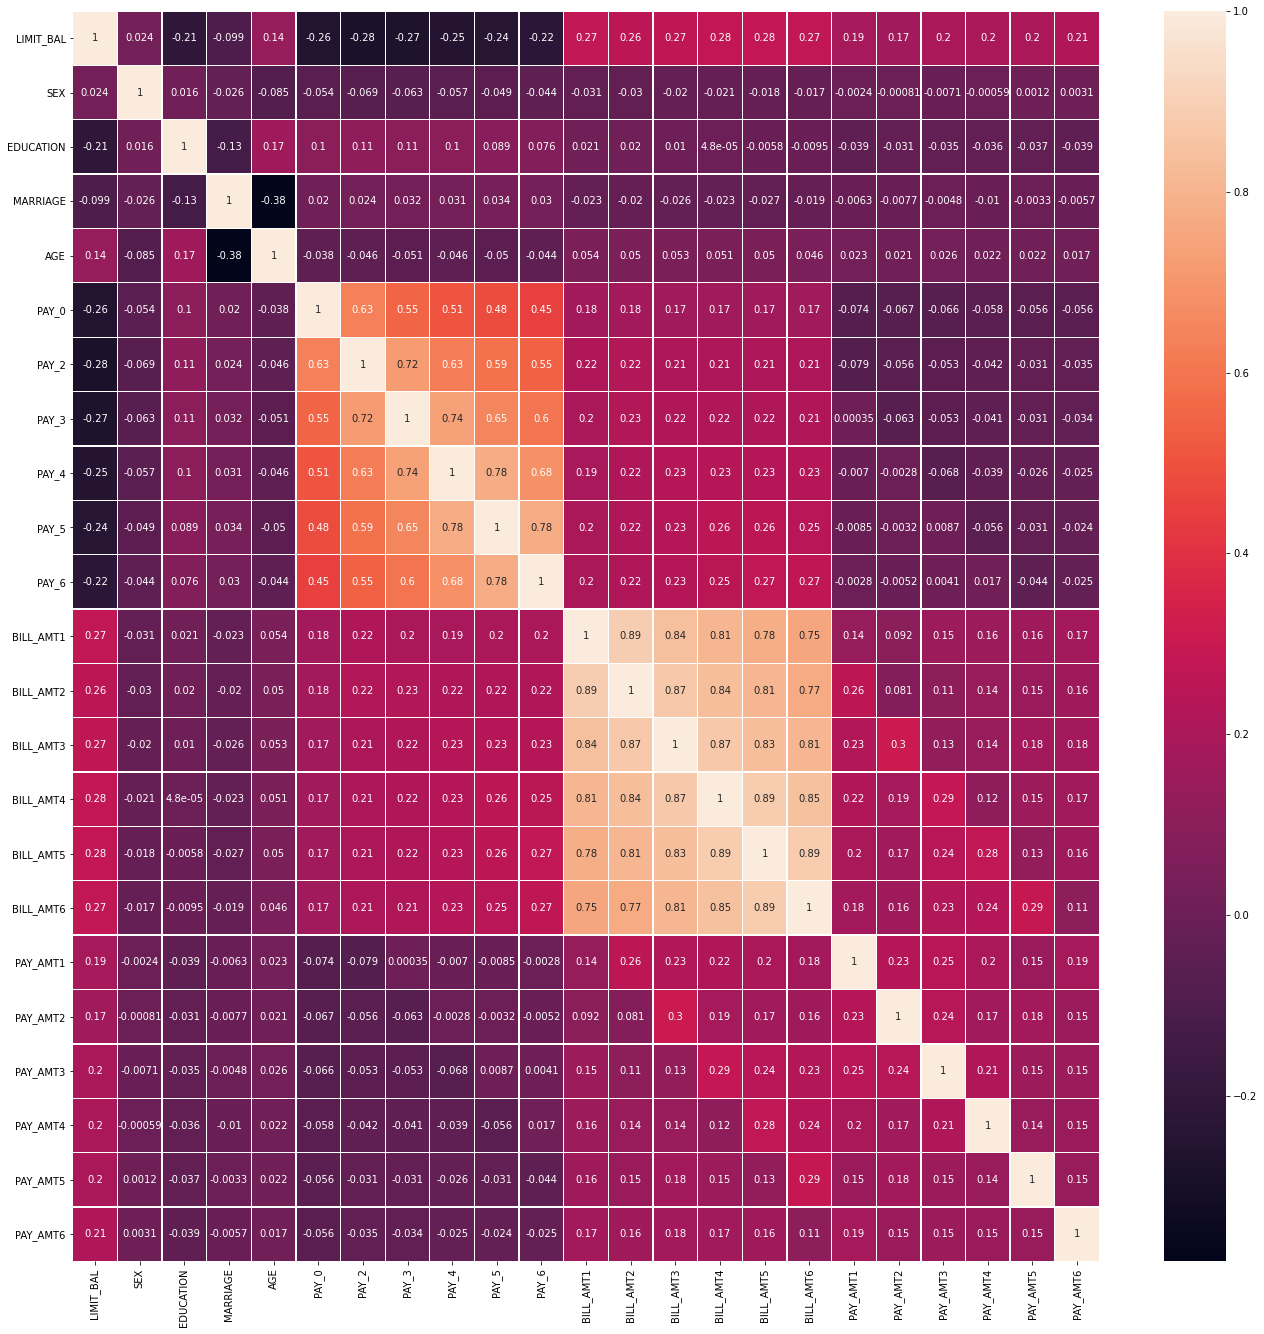

In [144]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(23,23)) 
sns.heatmap(corrd,annot=True,linewidths=0.30, ax=ax)

#### The above correlation map suggests that the variables BILL_AMT1-6 and PAY_AMT1-6 are highly correlated and might introduce problems into the model while Training. So it is better to use features selection or dimensionality reduction to reduce data leakage or noise in the data.

In [145]:
y.unique()

array([1, 0], dtype=int64)

### From the above , there are two classes of data present in the target variable. So it is a binomial classification

###### Dividing the dataset into training and testing with 75% as training data and the remaining as test data

In [146]:
X_train_org,X_test_org,y_train_org,y_test_org=train_test_split(X,y,random_state=0)

#### Scaling and transforming the data using MinMax Scaler

### As the data is not normally distributed and the data is skewed. So MinMaxScaler scales the data efficiently

In [147]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

# KNN Classification:

In [44]:
## Grid Search with Cross- Validation
max_class = np.max(np.bincount(y))
param_grid_knn={'n_neighbors': range(1, 10)}
print(" Parameter grid for KNN is: {}".format(param_grid_knn))

 Parameter grid for KNN is: {'n_neighbors': range(1, 10)}


In [45]:
grid_search_knn=GridSearchCV(KNeighborsClassifier(),param_grid_knn,return_train_score=True,n_jobs=-1)

In [46]:
grid_search_knn.fit(X_train,y_train_org)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10)}, return_train_score=True)

In [47]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.80


In [81]:
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train_org)
    train_score_array.append(knn.score(X_train, y_train_org))
    test_score_array.append(knn.score(X_test, y_test_org))

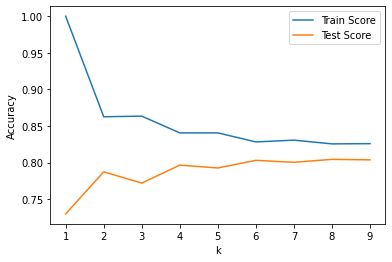

In [82]:
import matplotlib.pyplot as plt
x_axis = range(1,10)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score')
plt.plot(x_axis, test_score_array, label = 'Test Score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

### Train and Test scores for the best evaluated KNN Regression Model Parameters

In [52]:
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train_org)
ypred = grid_search_knn.predict(X_test)
cm = confusion_matrix(ypred,y_test_org)
f = f1_score(ypred,y_test_org)
print(cm)
print(f)

[[5513 1117]
 [ 355  515]]
0.4116706634692246


# Logisitic Regression:

In [53]:
param_grid_log ={'C':[0.01, 0.1, 1, 10, 100],
                'penalty':['l1','l2'],
                'solver':['lbfgs','liblinear']}
print(" Parameter grid for logistic regression is: {}".format(param_grid_log))

 Parameter grid for logistic regression is: {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'liblinear']}


In [54]:
grid_search_log=GridSearchCV(LogisticRegression(max_iter=1000),param_grid_log,return_train_score=True,n_jobs=-1)

###### Increased the Maximum number of interations in Logistic Regression as the model was converging

In [55]:
grid_search_log.fit(X_train,y_train_org)

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True)

In [56]:
print("Best parameters: {}".format(grid_search_log.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_log.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.81


### Train and Test scores for the best evaluated Logistic Regression Model Parameters

In [59]:
log = LogisticRegression(penalty = 'l1',solver='liblinear', C = 10)
log.fit(X_train, y_train_org)
print(log.score(X_train, y_train_org))
print(log.score(X_test, y_test_org))

0.8064444444444444
0.814


In [81]:
c_range = [0.01, 0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train_org)
    log_l2.fit(X_train, y_train_org)
    train_score_l1.append(log_l1.score(X_train, y_train_org))
    train_score_l2.append(log_l2.score(X_train, y_train_org))
    test_score_l1.append(log_l1.score(X_test, y_test_org))
    test_score_l2.append(log_l2.score(X_test, y_test_org))

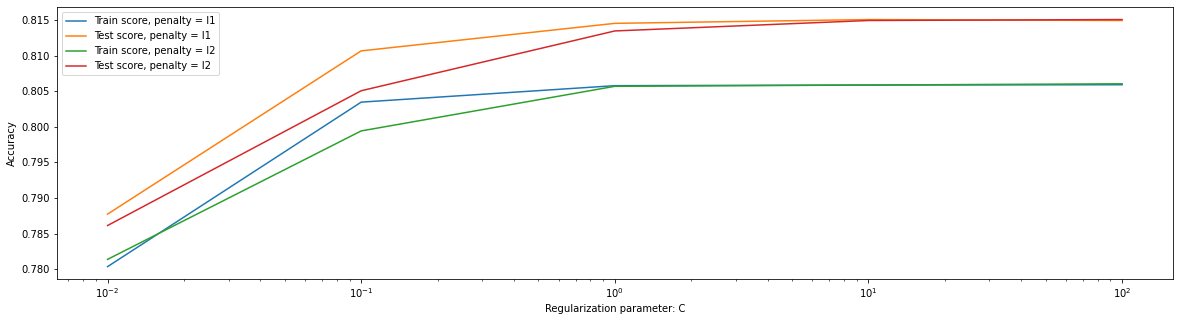

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [84]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_train[200:, [7,20]]
y_b = y_train_org[200:]

lreg = LogisticRegression(C = 0.1, penalty = 'l2')
lreg.fit(X_b, y_b) 

LogisticRegression(C=0.1)

Text(0, 0.5, 'worst area')

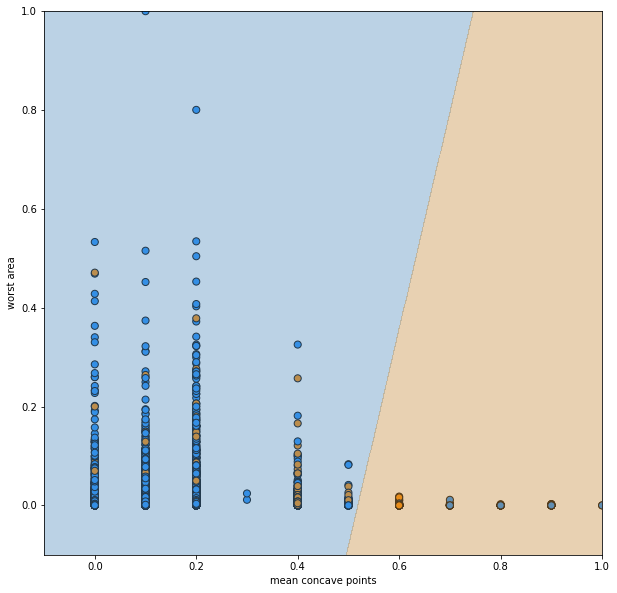

In [85]:
import matplotlib 
import numpy as np

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dodgerblue", "darkorange"])    

plt.subplots(figsize = (10,10))
xaxis = np.linspace(0,1, 100)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')


x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')

Text(0.5, 1.0, 'Logistic Regression with post-preocessing of results')

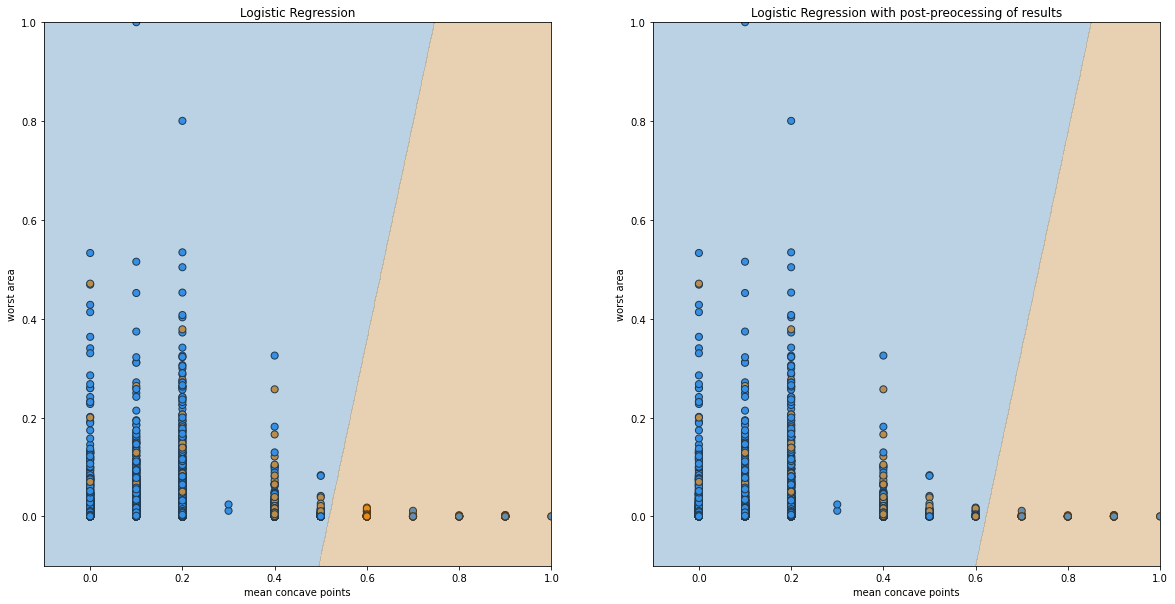

In [86]:
import matplotlib 

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dodgerblue", "darkorange"])    

plt.subplots(figsize = (20,10))
xaxis = np.linspace(0,1, 100)

plt.subplot(1,2,1)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')
x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')
plt.title('Logistic Regression')

plt.subplot(1,2,2)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')
x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:,1]
Z = Z.reshape(xx1.shape)
Z = np.where(Z <= 0.6, 0, 1)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')
plt.title('Logistic Regression with post-preocessing of results')

# Linear Support Vector Machine:

In [87]:
param_grid_lsvc ={'C':[0.01, 0.1, 1, 10, 100]}
print(" Parameter grid for linear SVC is: {}".format(param_grid_lsvc))

 Parameter grid for linear SVC is: {'C': [0.01, 0.1, 1, 10, 100]}


In [88]:
grid_search_lsvc=GridSearchCV(LinearSVC(max_iter=10000),param_grid_lsvc,return_train_score=True,n_jobs=-1)

In [89]:
grid_search_lsvc.fit(X_train,y_train_org)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(estimator=LinearSVC(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [90]:
print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.80


### Train and Test scores for the best evaluated Linear Support Vector Regression Model Parameters

In [91]:
lsvc = LinearSVC(C=10,max_iter=10000)
lsvc.fit(X_train, y_train_org)
print(lsvc.score(X_train, y_train_org))
print(lsvc.score(X_test, y_test_org))

0.7975555555555556
0.8054666666666667


# Kernelized Support Vector Machine (rbf, poly, and linear):

In [51]:
param_grid_ksvc={'C':[0.01, 0.1, 1, 10, 100],
                'kernel':['rbf','poly','linear']}
print(" Parameter grid for kernel SVC is: {}".format(param_grid_ksvc))

 Parameter grid for kernel SVC is: {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf', 'poly', 'linear']}


In [52]:
grid_search_ksvc=GridSearchCV(SVC(),param_grid_ksvc,return_train_score=True,n_jobs=-1)

In [53]:
grid_search_ksvc.fit(X_train,y_train_org)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'linear']},
             return_train_score=True)

In [54]:
print("Best parameters: {}".format(grid_search_ksvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ksvc.best_score_))

Best parameters: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score: 0.82


### Train and Test scores for the best evaluated Kernel Support Vector Regression Model Parameters

In [67]:
ksvc = SVC(C=10,kernel='rbf')
ksvc.fit(X_train, y_train_org)
print(ksvc.score(X_train, y_train_org))
print(ksvc.score(X_test, y_test_org))

0.8210666666666666
0.8232


# Decision Tree Classifier:

In [59]:
param_grid_dtc={'criterion':['gini','entropy'],
               'max_depth':[1,2,3,4,5,6,7,8,9,10]}
print(" Parameter grid for Decision Tree Classifier is: {}".format(param_grid_dtc))

 Parameter grid for Decision Tree Classifier is: {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [60]:
grid_search_dtc=GridSearchCV(DecisionTreeClassifier(),param_grid_dtc,return_train_score=True,n_jobs=-1)

In [61]:
grid_search_dtc.fit(X_train,y_train_org)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [62]:
print("Best parameters: {}".format(grid_search_dtc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtc.best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 3}
Best cross-validation score: 0.82


### Train and Test scores for the best evaluated Kernel Support Vector Regression Model Parameters

In [68]:
dtr = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtr.fit(X_train, y_train_org)
print(dtr.score(X_train, y_train_org))
print(dtr.score(X_test, y_test_org))

0.8188888888888889
0.8237333333333333


<AxesSubplot:>

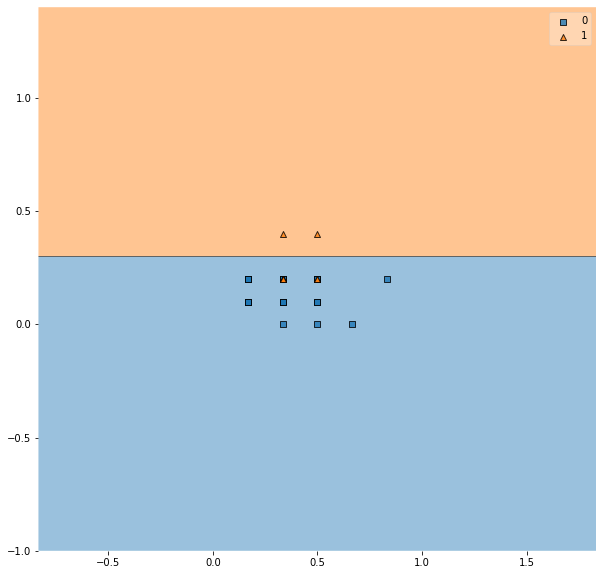

In [101]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:50,[2,10]]
y_b = y_train_org[:50]
a = np.array(y_b.values.tolist())

plt.subplots(figsize = (10,10))
dtree = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree.fit(X_b, a)

plot_decision_regions(X_b, a, clf = dtree)

### Comparing all the classifier's cross-validation scores, the kernelized SVM and DecisionTreeClassfier have returned the scores of approximately equal values. But the computing power required by kernelized SVM suggests that it is best to use DecisionTreeClassifier for this data to predict values with accuracy

In [69]:
#### Fitting the DecisionTreeClassifier on the whole dataset

In [45]:
dtr = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtr.fit(X_train, y_train_org)
print(dtr.score(X_train, y_train_org))
print(dtr.score(X_test, y_test_org))

0.8185777777777777
0.8246666666666667


## Predicting the target values for the Test Set:

In [46]:
y_pred=dtr.predict(X_test)
predictions=pd.DataFrame(y_pred,columns=['default_payment_next_month'])
predictions

,default_payment_next_month
0,1
1,0
2,0
3,0
4,0
...,...
7495,0
7496,0
7497,0
7498,0


Text(0.5, 1.0, 'Confusion matrix')

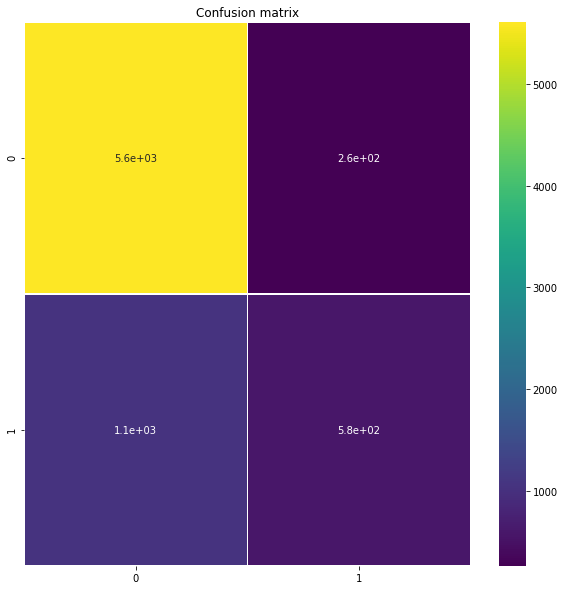

In [51]:
%matplotlib inline


plt.subplots(figsize = (10,10))
scores_image = sns.heatmap(
    confusion_matrix(y_test_org, y_pred), linewidths= 0.5, cmap = 'viridis', annot=True)
plt.title("Confusion matrix")

# The train and test scores for the model with the best parameters are:
# Train Score : 0.8188888888888889
# Test Score : 0.8237333333333333
# Cross-validation score : 0.82

### Conclusion : Decision Tree Classifier is the best model for the classification task with the cross-validation score 0.82